# Aula 7 - Segmentação de Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Exemplo Scikit-Learn

<Axes: >

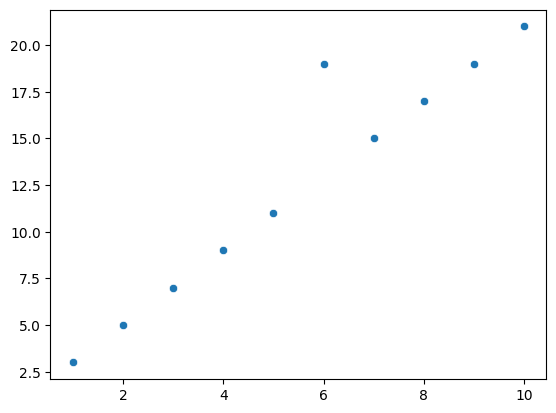

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3, 5, 7, 9, 11, 19, 15, 17, 19, 21]).reshape(-1, 1)

sns.scatterplot(x=x.flatten(), y=y.flatten())

Fórmula: y = 2.04x + 1.4
Se x = 100, y = [[205.03636364]]


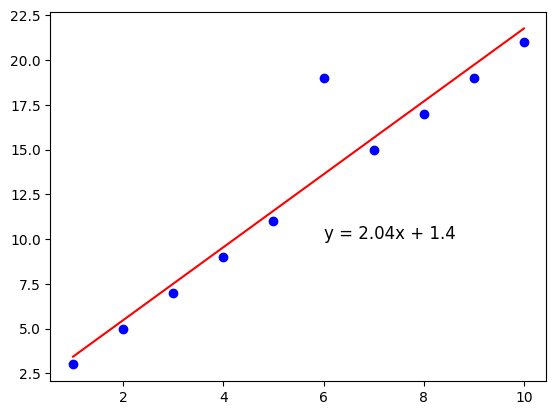

In [7]:
linear = LinearRegression()
linear.fit(x, y)

m = linear.coef_[0][0] 
b = linear.intercept_[0]
#pode acontecer problemas: y = 2.0000000000000004x + 0.9999999999999982
m = np.round(m,2)
b = np.round(b,2)


print(f"Fórmula: y = {m}x + {b}")

plt.plot(x, linear.predict(x), color='red')
plt.plot(x.flatten(), y.flatten(), 'o', color='blue')
plt.text(6, 10, f"y = {m}x + {b}", fontsize=12)

print(f"Se x = 100, y = {linear.predict([[100]])}")

### Segmentação

In [37]:
df = pd.read_excel('clientes.xlsx')
df

,Idade,Gênero,Renda_Mensal,Educação,Compras_Anuais
0,41,Feminino,8690,Ensino Fundamental,34
1,62,Masculino,8024,Ensino Superior,48
2,31,Feminino,5148,Ensino Superior,34
3,54,Feminino,9670,Ensino Superior,48
4,58,Masculino,12361,Ensino Médio,48
...,...,...,...,...,...
1998,42,Masculino,9961,Pós-Graduação,34
1999,43,Feminino,7251,Pós-Graduação,34
2000,27,Feminino,14664,Pós-Graduação,20
2001,27,Feminino,13913,Ensino Fundamental,20


Para separar os dados em determinadas classes (rotular) devemos encontrar padrões com os dados, encontrar quais dimensões pesam mais.

In [38]:
df['Gênero'] = df['Gênero'].map({'Feminino': 0, 'Masculino': 1})
df['Educação'] = df['Educação'].map({'Ensino Fundamental': 1, 'Ensino Médio': 2, 'Ensino Superior': 3, 'Pós-Graduação': 4})

X = df.values

In [17]:
X

array([[   41,     0,  8690,     1,    34],
       [   62,     1,  8024,     3,    48],
       [   31,     0,  5148,     3,    34],
       ...,
       [   27,     0, 14664,     4,    20],
       [   27,     0, 13913,     1,    20],
       [   27,     1, 14344,     3,    20]])

Aprendizado não supervisionado, onde o X é dado mas o Y não, pois quem vai rotular é o modelo, eu não tenho rótulos prontos para classificar os dados

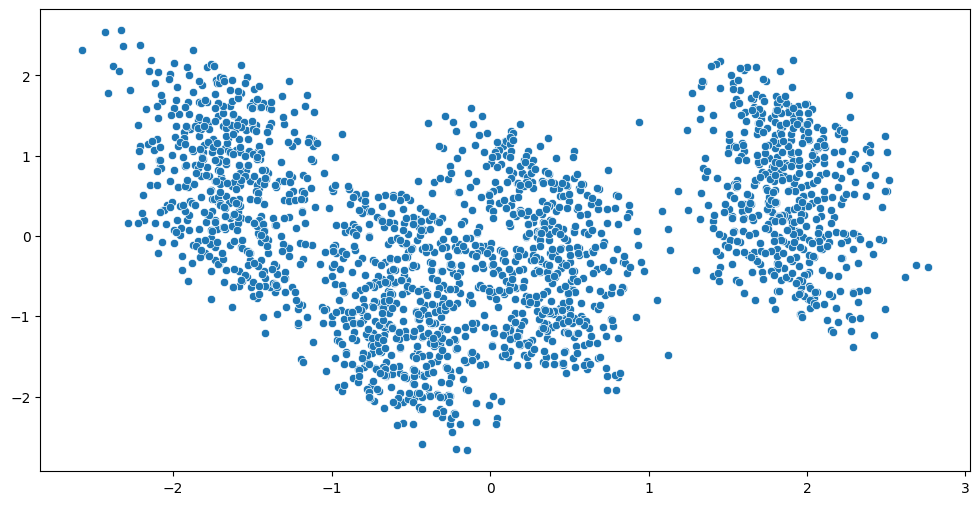

In [39]:
X = df.values
scaler = StandardScaler()
# Normalizar os dados para todos estarem na mesma escala, ou seja, o máximo de um é o máximo de todos, assim como o mínimo, média e etc
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()

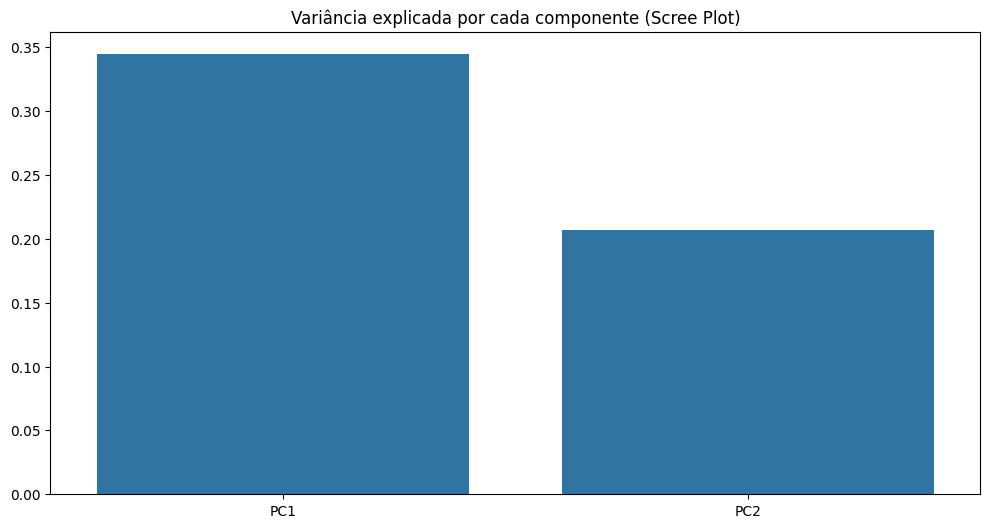

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=['PC1', 'PC2'], y=pca.explained_variance_ratio_)
plt.title('Variância explicada por cada componente (Scree Plot)')
plt.show()

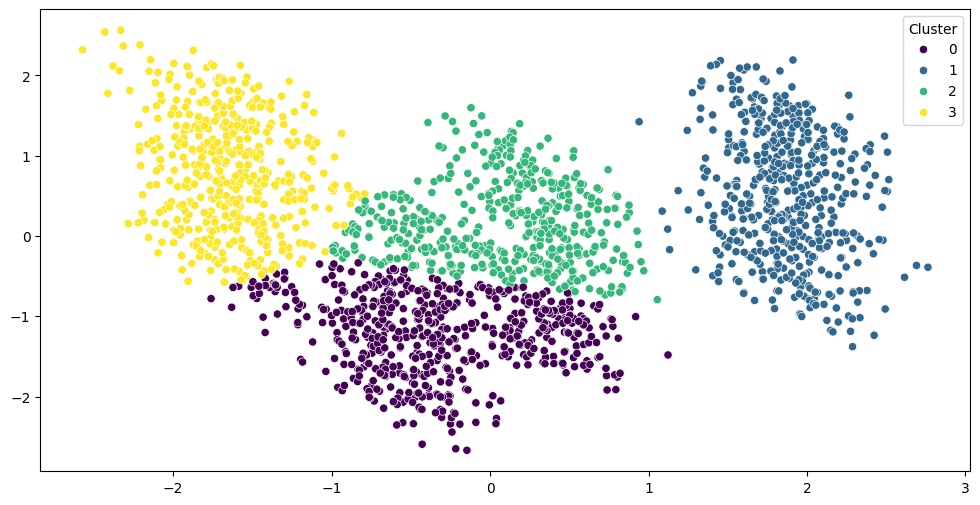

In [41]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

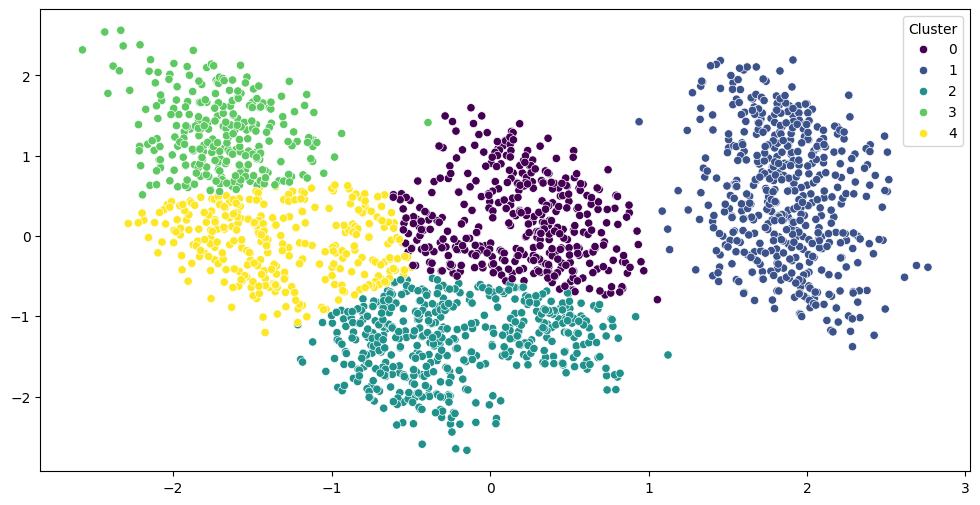

In [21]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

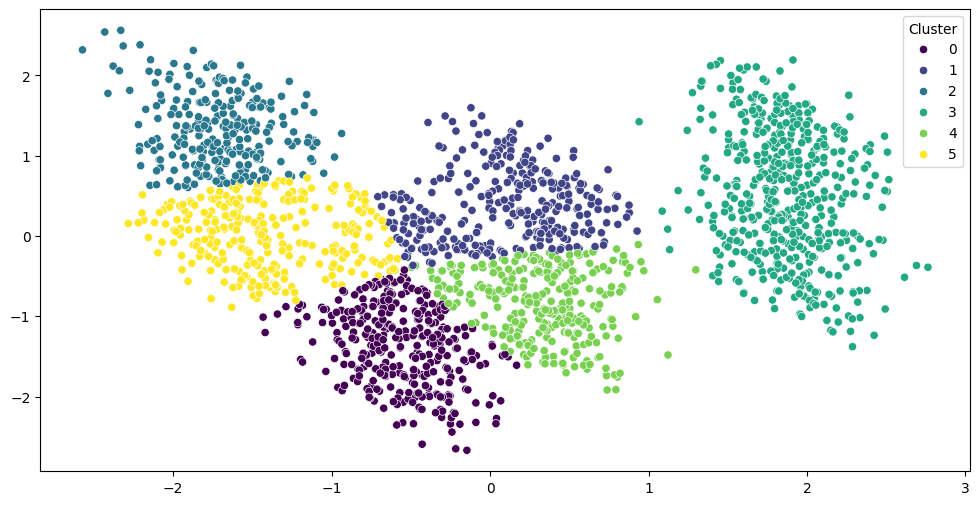

In [22]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

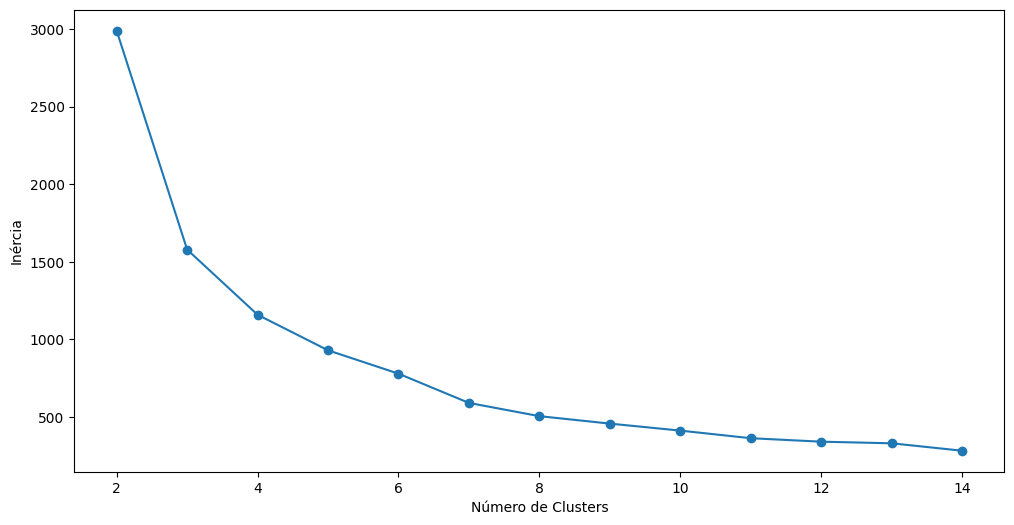

In [23]:
inercia = []
# (inercia é um valor do kameans, para decidir o melhor número de clusters, conferimos qual é a melhor inercia)
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    df['Cluster'] = kmeans.labels_
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 15), inercia, marker='o')
# plt.plot(3, inercia[1], marker='o', markersize=15, markeredgewidth=2, markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

Melhor inercia é o valor que "quebra" no gráfico e começa a estabilizar (o 3 no gráfico). Porém, as vezes esse ponto não é o melhor, pois como podemos ver na clusterização, 4 clusters separam bem os dados. Nada impede de o 4 ser escolhido se for melhor para os dados, além de que o 4 também apresenta uma queda antes de estabilizar os valores, então faz sentido escolhê-lo.

In [25]:
diff = np.diff(inercia)
maior_dif = np.argmin(diff) + 1
print(f'O número ideal de clusters é {list(range(2, 15))[maior_dif]}')

O número ideal de clusters é 3


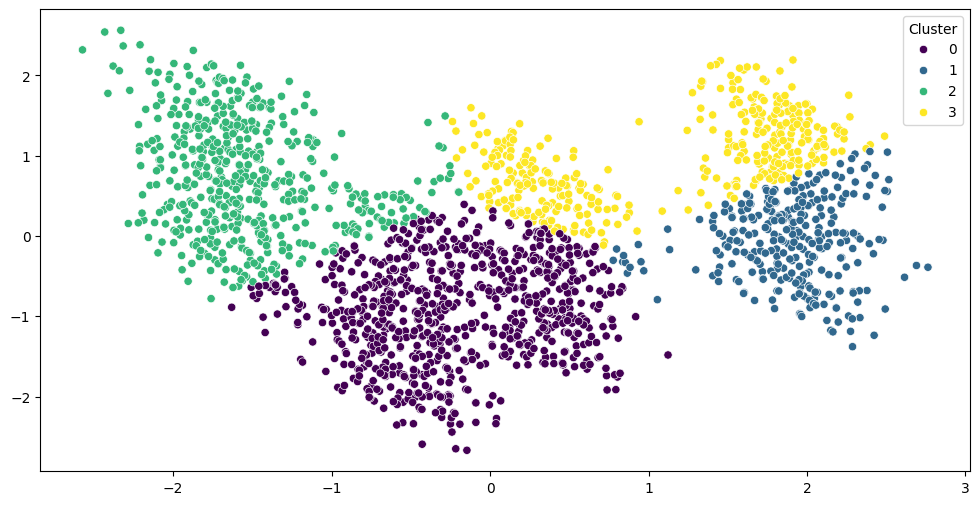

In [32]:
kmeans = KMeans(n_clusters=4, random_state=93)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis')
plt.show()

In [42]:
df.groupby('Cluster').agg({'Idade': ['min', 'max', 'median'], 'Renda_Mensal': 'mean', 'Compras_Anuais': 'mean', 'Educação': ['min', 'max', 'median']})

Idade             Renda_Mensal Compras_Anuais Educação           
          min max median          mean           mean      min max median
Cluster                                                                  
0          21  51   40.0   7211.179894      15.209877        1   4    1.0
1          42  70   60.0   9252.658000      47.972000        1   4    3.0
2          29  53   39.0   7512.039216      26.557734        1   4    3.0
3          18  43   27.0  14190.398323      19.412998        1   4    3.0

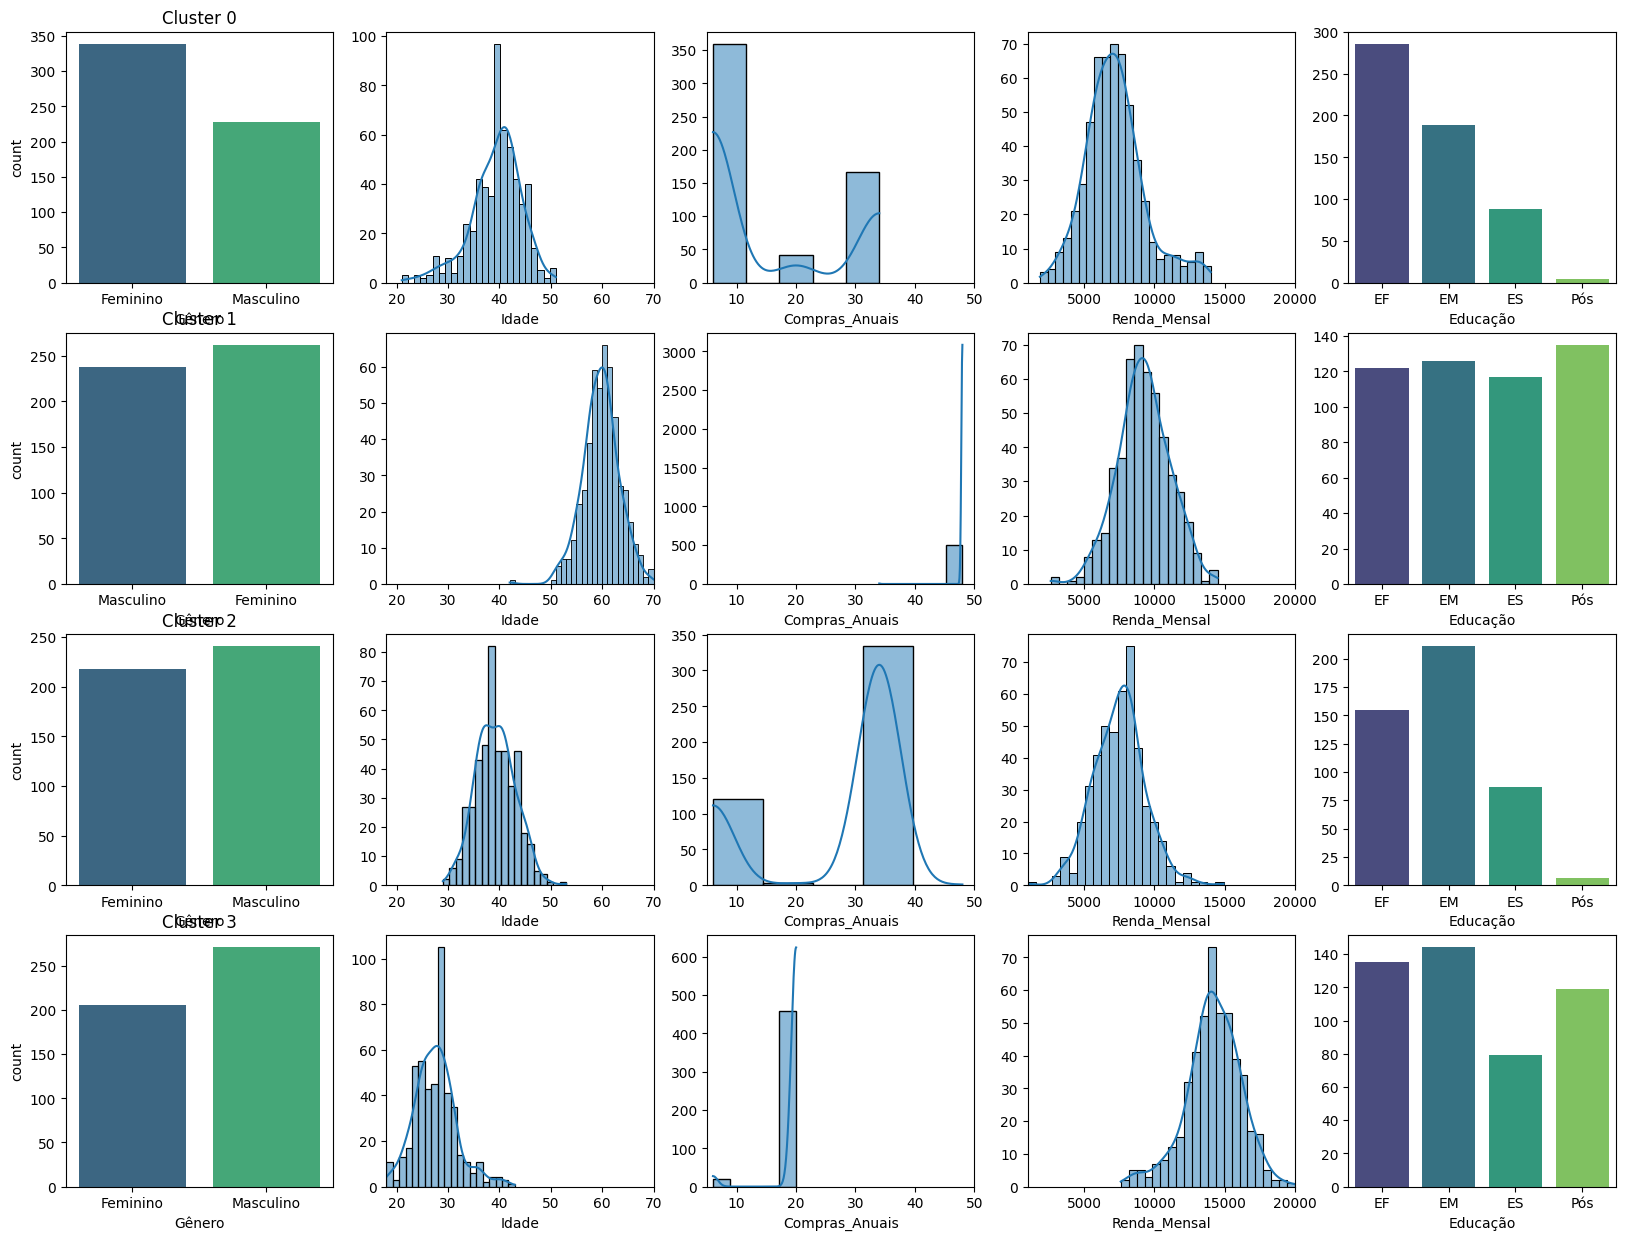

In [43]:
df['Gênero'] = df['Gênero'].map({0: 'Feminino', 1: 'Masculino'})
df['Educação'] = df['Educação'].map({1: 'Ensino Fundamental', 2: 'Ensino Médio', 3: 'Ensino Superior', 4: 'Pós-Graduação'})

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

for cluster in range(4): # Temos 3 clusters! 
    sns.countplot(data=df[df['Cluster'] == cluster], x='Gênero', ax=ax[cluster, 0], palette='viridis')
    sns.histplot(data=df[df['Cluster'] == cluster], x='Idade', ax=ax[cluster, 1], kde=True, palette='viridis')
    ax[cluster, 1].set_xlim(18, 70)
    sns.histplot(data=df[df['Cluster'] == cluster], x='Compras_Anuais', ax=ax[cluster, 2], kde=True, palette='viridis', bins=5)
    ax[cluster, 2].set_xlim(5, 50)
    sns.histplot(data=df[df['Cluster'] == cluster], x='Renda_Mensal', ax=ax[cluster, 3], kde=True, palette='viridis')
    ax[cluster, 3].set_xlim(1000, 20000)
    ax[cluster, 0].set_title(f'Cluster {cluster}')
    sns.countplot(data=df[df['Cluster'] == cluster], x='Educação', ax=ax[cluster, 4], palette='viridis')
    ax[cluster, 4].set_xticklabels(['EF', 'EM', 'ES', 'Pós'])
    ax[cluster, 1].set_ylabel('')
    ax[cluster, 2].set_ylabel('')
    ax[cluster, 3].set_ylabel('')
    ax[cluster, 4].set_ylabel('')